## 01 kNN 基础

In [43]:
import numpy as np
import matplotlib.pyplot as plt

### kNN 基础概念

见PPT

### 实现我们自己的 kNN

#### 创建简单测试用例

In [44]:
# 原始数据集
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [45]:
# 改成训练样本集
# 先从列表改成np中的array
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

In [46]:
X_train

array([[3.39353321, 2.33127338],
       [3.11007348, 1.78153964],
       [1.34380883, 3.36836095],
       [3.58229404, 4.67917911],
       [2.28036244, 2.86699026],
       [7.42343694, 4.69652288],
       [5.745052  , 3.5339898 ],
       [9.17216862, 2.51110105],
       [7.79278348, 3.42408894],
       [7.93982082, 0.79163723]])

In [47]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

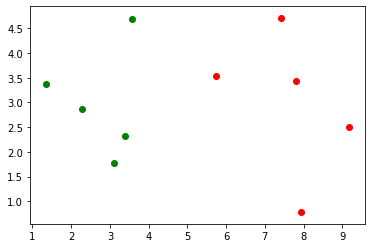

In [48]:
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='g')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='r')
plt.show()

预测：
加入进入一个新的数据x，预测x应该属于哪一类？

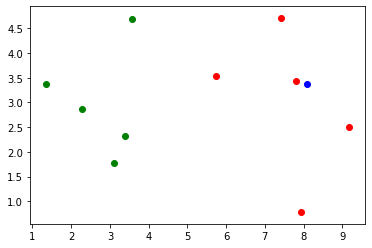

In [49]:
x = np.array([8.093607318, 3.365731514])

plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='g')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='r')
plt.scatter(x[0], x[1], color='b')
plt.show()

## kNN的过程
- 先计算新来的点和原来的点的距离

In [50]:
from math import sqrt
distances = []
# 距离使用最常用的欧拉距离，也就是坐标差的平方开方
for x_train in X_train:
    d = sqrt(np.sum((x_train - x)**2))
    distances.append(d)

In [51]:
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [52]:
# 借用列表生成式
distances = [sqrt(np.sum((x_train - x)**2))
             for x_train in X_train]

In [53]:
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [54]:
# 使用索引更加方便
np.argsort(distances)

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2], dtype=int64)

In [55]:
nearest = np.argsort(distances)

In [56]:
k = 6

In [57]:
topK_y = [y_train[neighbor] for neighbor in nearest[:k]]

In [58]:
topK_y

[1, 1, 1, 1, 1, 0]

In [59]:
# 可以数一下有多少个
from collections import Counter
votes = Counter(topK_y)

In [60]:
votes

Counter({1: 5, 0: 1})

In [61]:
# 找出票数最多的1个元素
votes.most_common(1)

[(1, 5)]

In [62]:
# 这个列表中的第0个，其中第0位代表类型
predict_y = votes.most_common(1)[0][0]

In [63]:
predict_y

1

In [72]:
%run ../02-kNN-in-scikit-learn/kNN_function/kNN.py
print(kNN_classify(k, X_train, y_train, x))

1
